In [86]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import requests

In [2]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
s = requests.get(Url).content
df= pd.read_csv(Url)
df.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
#df.corr()
#bx = df.plot(kind='scatter', x='a',y='survived',color = 'Green')
df.describe()
#df['Embarked'].replace(['S','C','Q','nan'],[3,1,2,0])
df=df.replace({'Embarked': {'S': 3, 'C': 1,'Q': 2,'nan': 0}})
df=df.fillna(0)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [42]:
X=df.drop(['Survived','Ticket','Name','Sex','Cabin','Age'],axis=1)
#X.dropna(inplace=True)
#df.fillna(method=’ffill’)
#x=x.dropna()
y=df['Survived']
y=y.values.reshape(-1,1)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.,random_state=42)
y_train.shape
X.isna().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [106]:
from sklearn.tree import DecisionTreeClassifier
from scipy import stats as st
clas=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=2,min_samples_split=2,splitter="best",max_features="auto",random_state=22)
clas.fit(x_train,y_train)
pre=clas.predict(x_test)
s1=cross_val_score(clas,x_train,y_train,cv=10)*100
s=cross_val_score(clas,y_test,pre,cv=10)*100
score=accuracy_score(y_test,pre)*100
print("Accuracy score without cv :",score)
print("Train_score :", s1, " :: ","Max_Train_score :", s1.max())
print("Test score :", s, "::","Max_Test_score :", s.max())
#numpy.mean(s1, axis=None, dtype=None, out=None)
#print(st.mean(s1,dtype = np.float64))
#print(st.mean(s2,dtype = np.float64))

Accuracy score without cv : 65.3658536585366
Train_score : [68.11594203 66.66666667 71.01449275 62.31884058 68.11594203 71.01449275
 66.17647059 75.         66.17647059 76.47058824]  ::  Max_Train_score : 76.47058823529412
Test score : [66.66666667 66.66666667 66.66666667 71.42857143 71.42857143 70.
 70.         70.         70.         70.        ] :: Max_Test_score : 71.42857142857143


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

In [ ]:
""

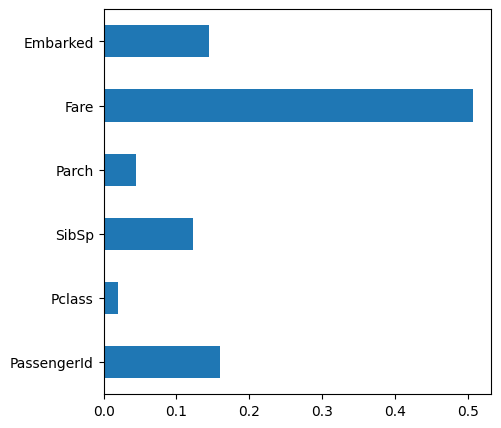

In [83]:
clas.feature_importances_
fea_imp=pd.Series(clas.feature_importances_,index=X.columns)
fea_imp.sort_values()
fea_imp.plot(kind="barh",figsize=(5,5));